<a href="https://colab.research.google.com/github/daJster/Learning_Tools_2023/blob/main/OPA_2023_Pruning_Seminar_Post_Training_Pruning_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flopco-pytorch

!gdown --id 1dOg1bqFo3PN__kGtS6b3AdYbl_OjtEUk
!tar -xf arxiv.tar
!ls

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dOg1bqFo3PN__kGtS6b3AdYbl_OjtEUk
To: /content/arxiv.tar
100% 45.0M/45.0M [00:00<00:00, 177MB/s]
arxiv.tar  cifar100-resnet18_8x.pt  pruning_utils.py  resnet_8x.py  sample_data  utils.py


# ResNet-18

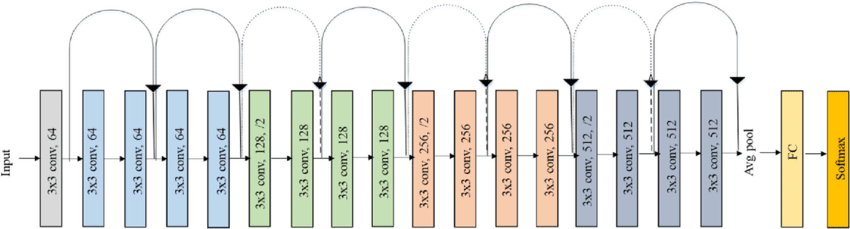

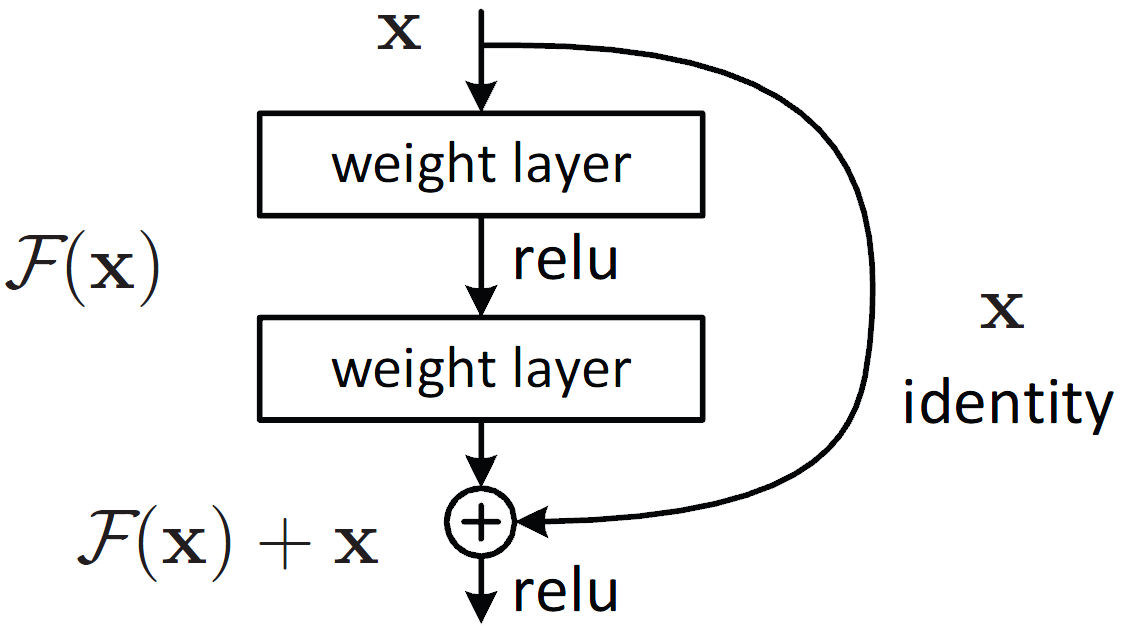

![](resnet.png)

In [2]:
from resnet_8x import ResNet18_8x

model = ResNet18_8x(num_classes=100)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [3]:
layer = model.layer1

layer

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
)

In [4]:
for child_name, child in layer.named_children():
    print(f"{child_name}: {child}")

0: BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
)
1: BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
)


In [5]:
for module_name, module in layer.named_modules():
    print(f"{module_name}: {module}")

: Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
)
0: BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [6]:
model.layer1[0].conv1

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [7]:
model._modules["layer1"]._modules["0"].conv1

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [8]:
def get_layer_by_name(model, mname: str):
    module = model
    mname_list = mname.split('.')
    for mname in mname_list:
        module = module._modules[mname]

    return module

def replace_layer_by_name(model, mname: str, layer):
    module = model
    mname_list = mname.split('.')
    for mname in mname_list[:-1]:
        module = module._modules[mname]

    module._modules[mname_list[-1]] = layer

In [9]:
get_layer_by_name(model, "layer1.0.conv1")

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

# Unstructed pruning

In unstructed pruning we want to zero all weights that are below some threshold. Unstructed pruning == Sparsification.

In [10]:
import torch
import torch.nn as nn
from resnet_8x import ResNet18_8x

import numpy as np

from copy import deepcopy

from flopco import FlopCo

import matplotlib.pyplot as plt
%matplotlib inline

Load ResNet-18 trained on CIFAR-100.

In [11]:
model = ResNet18_8x(num_classes=100)
model.load_state_dict(torch.load("cifar100-resnet18_8x.pt"))

<All keys matched successfully>

Collect names of all convolutional layers

In [12]:
conv_layers = [module_name for module_name, module in model.named_modules() if isinstance(module, nn.Conv2d)]
conv_layers

['conv1',
 'layer1.0.conv1',
 'layer1.0.conv2',
 'layer1.1.conv1',
 'layer1.1.conv2',
 'layer2.0.conv1',
 'layer2.0.conv2',
 'layer2.0.shortcut.0',
 'layer2.1.conv1',
 'layer2.1.conv2',
 'layer3.0.conv1',
 'layer3.0.conv2',
 'layer3.0.shortcut.0',
 'layer3.1.conv1',
 'layer3.1.conv2',
 'layer4.0.conv1',
 'layer4.0.conv2',
 'layer4.0.shortcut.0',
 'layer4.1.conv1',
 'layer4.1.conv2']

Prepare some help functions

In [33]:
%%writefile pruning_utils.py

import torch
import torch.nn as nn
from copy import deepcopy
from utils import get_layer_by_name, replace_layer_by_name
import numpy as np


def get_mask(weights, strategy, pruning_rate):

    if strategy == "global":

        # here `pruning_rate` is global threshold
        mask = weights > pruning_rate

    elif strategy == "local":

        # here `pruning_rate` is ratio of weights that should be pruned in this weight

        # find threshold that is `prune_rate`(from 0 to 1) quantile of weights.
        # use torch.quantile(...)

        # Your code here
        threshold = torch.quantile(weights, pruning_rate)

        # print(f"Local threshold: {threshold.item():.3e}")
        mask = weights > threshold

    else:
        mask = torch.tensor(1.)
        print(f"Unknown strategy: {strategy}")

    return mask

Overwriting pruning_utils.py


Fill class for 2D convolution with sparsified weight.

In [34]:
%%writefile -a pruning_utils.py

class MaskedConv2d(nn.Module):
    def __init__(self, conv_orig):
        super(MaskedConv2d, self).__init__()

        self.conv = deepcopy(conv_orig)
        self.register_buffer("mask", torch.tensor(1.))

    def compute_mask(self, strategy="local", pruning_rate=0.1):

        weights = self.conv.weight.data.abs()
        self.mask = get_mask(weights, strategy, pruning_rate)

    def forward(self, x):

        self.conv.weight.data *= self.mask
        out = self.conv(x)

        return out

    def prune_grad(self):

        self.conv.weight.grad *= self.mask

Appending to pruning_utils.py


Let's try with one layer (1st convolutional layer)

In [35]:
import pruning_utils as putils

conv1 = putils.MaskedConv2d(deepcopy(model.conv1))

conv1.compute_mask("global", 0.01)

f'Non zero weight entries ratio: {conv1.mask.sum() / np.prod(conv1.mask.size()):.3f}'

'Non zero weight entries ratio: 0.746'

In [36]:
conv1.compute_mask("local", 0.5)

f'Non zero weight entries ratio: {conv1.mask.sum() / np.prod(conv1.mask.size()):.3f}'

'Non zero weight entries ratio: 0.500'

Prepare pruning function

In [37]:
%%writefile -a pruning_utils.py

def replace_layers_unstructed(model, conv_list):

    for conv_name in conv_list:

        # get layer from model, turn it into masked conv and plug into model

        # Your code here
        conv = get_layer_by_name(model, conv_name)
        conv_masked = MaskedConv2d(conv)
        replace_layer_by_name(model, conv_name, conv_masked)

def compute_conv_masks(model, conv_list, strategy, prune_rate):

    for conv_name in conv_list:

        conv = get_layer_by_name(model, conv_name)
        # print(f'[{conv_name}] ', end="")
        conv.compute_mask(strategy, prune_rate)

def prune_all_gradients(model, conv_list):

    for conv_name in conv_list:
        conv = get_layer_by_name(model, conv_name)
        conv.prune_grad()

def compute_nonzero_ratio(model, conv_list):
    nonzero_weights = 0
    total_weights = 0

    for conv_name in conv_list:

        # get layer from model, find number of nonzero weights
        # and total number of weights using mask, save them

        # Your code here
        conv = get_layer_by_name(model, conv_name)
        nonzero_weights += conv.mask.sum()
        total_weights += np.prod(conv.mask.size())

    return nonzero_weights / total_weights, (nonzero_weights, total_weights)

def prune_unstructed(model, conv_list, strategy="local", prune_rate=0.1):

    # make copy of model
    model_pruned = deepcopy(model)

    # replace original conv2d with masked conv2d with mask == 1
    replace_layers_unstructed(model_pruned, conv_list)

    # estimate sparsification mask (0 and 1)
    compute_conv_masks(model_pruned, conv_list, strategy=strategy, prune_rate=prune_rate)

    return model_pruned

Appending to pruning_utils.py


In [38]:
conv_layers

['conv1',
 'layer1.0.conv1',
 'layer1.0.conv2',
 'layer1.1.conv1',
 'layer1.1.conv2',
 'layer2.0.conv1',
 'layer2.0.conv2',
 'layer2.0.shortcut.0',
 'layer2.1.conv1',
 'layer2.1.conv2',
 'layer3.0.conv1',
 'layer3.0.conv2',
 'layer3.0.shortcut.0',
 'layer3.1.conv1',
 'layer3.1.conv2',
 'layer4.0.conv1',
 'layer4.0.conv2',
 'layer4.0.shortcut.0',
 'layer4.1.conv1',
 'layer4.1.conv2']

In [39]:
%pdb

Automatic pdb calling has been turned ON


In [40]:
import importlib
importlib.reload(putils)

model_pruned = putils.prune_unstructed(model, conv_layers, strategy="local", prune_rate=0.1)

# compute nonzero elements
ratio, (total_nonzero_elements, total_elements) = putils.compute_nonzero_ratio(model_pruned, conv_layers)
f'Non zero entries ratio: {ratio:.3f} ({total_nonzero_elements}/{total_elements})'

'Non zero entries ratio: 0.900 (10043299/11159232)'

In [41]:
instances = [nn.Conv2d, nn.Linear, nn.BatchNorm2d, nn.ReLU,
             nn.MaxPool2d, nn.AvgPool2d, nn.Softmax]

stats1 = FlopCo(model, img_size = (1, 3, 32, 32), instances=instances)
stats2 = FlopCo(model_pruned, img_size = (1, 3, 32, 32), instances=instances)

f'MACs ratio: {stats2.total_macs / stats1.total_macs:.3f}'

'MACs ratio: 1.000'

# BatchNorm Calibration

$$y = \gamma \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta$$

Prepare dataset

In [42]:
from utils import batchnorm_callibration, get_validation_scores, fix_random_seed, get_cifar100_dataloader

fix_random_seed(seed=42)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset_path = "./"
batch_size = 256
num_workers = 0

train_loader, val_loader = get_cifar100_dataloader(dataset_path, batch_size, num_workers, download=True)
calibrate_batches = 200

100%|██████████| 169001437/169001437 [00:03<00:00, 46516658.53it/s]


Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


Load and prune model

In [43]:
model = ResNet18_8x(num_classes=100)
model.load_state_dict(torch.load("cifar100-resnet18_8x.pt"))

conv_layers = [module_name for module_name, module in model.named_modules() if isinstance(module, nn.Conv2d)]

model_pruned = putils.prune_unstructed(model, conv_layers, strategy="local", prune_rate=0.3)

model_pruned = model_pruned.to(device)
model = model.to(device)

Get accuracy for original, prund and callibrated models

In [44]:
top1_acc, top5_acc = get_validation_scores(model, val_loader, device=device)
print(f'Original model. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')

top1_acc, top5_acc = get_validation_scores(model_pruned, val_loader, device=device)
print(f'Pruned model. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')

batchnorm_callibration(model_pruned.eval(), train_loader, layer_name=conv_layers[0], n_callibration_batches=calibrate_batches, device=device)

top1_acc, top5_acc = get_validation_scores(model_pruned, val_loader, device=device)
print(f'Calibrated model. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')

  0%|          | 0/40 [00:00<?, ?it/s]

/content/utils.py:105: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(res)
/content/utils.py:105: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(res)


Original model. Top 1 acc: 0.771, Top 5 acc: 0.936


  0%|          | 0/40 [00:00<?, ?it/s]

Pruned model. Top 1 acc: 0.766, Top 5 acc: 0.937


  0%|          | 0/40 [00:00<?, ?it/s]

Calibrated model. Top 1 acc: 0.769, Top 5 acc: 0.937


Plot sparsification ratio - accuracy tradeoff

In [45]:
non_zero_ratios, top1_accs, top1_bn_accs = [], [], []

for prune_rate in [0.25, 0.5, 0.75]:

    model_pruned = putils.prune_unstructed(model, conv_layers, strategy="local", prune_rate=prune_rate)
    ratio, _ = putils.compute_nonzero_ratio(model_pruned, conv_layers)

    top1_acc, _ = get_validation_scores(model_pruned, val_loader, device=device)
    batchnorm_callibration(model_pruned.eval(), train_loader, layer_name=conv_layers[0], n_callibration_batches=calibrate_batches, device=device)
    top1_acc_bn, _ = get_validation_scores(model_pruned, val_loader, device=device)

    non_zero_ratios += [ratio]
    top1_accs += [top1_acc]
    top1_bn_accs += [top1_acc_bn]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

[tensor(0.7500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0')]


TypeError: ignored

> /usr/local/lib/python3.10/dist-packages/torch/_tensor.py(1030)__array__()
   1028             return handle_torch_function(Tensor.__array__, (self,), self, dtype=dtype)
   1029         if dtype is None:
-> 1030             return self.numpy()
   1031         else:
   1032             return self.numpy().astype(dtype, copy=False)

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


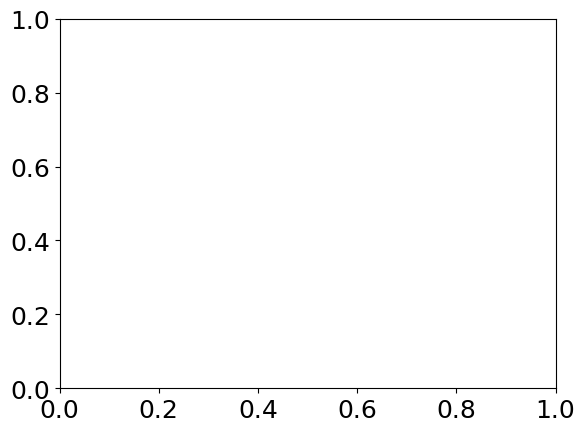

In [53]:
plt.rcParams.update({'font.size': 18})
plt.plot(non_zero_ratios, top1_accs, label="before bn")
plt.plot(non_zero_ratios, top1_bn_accs, label="after bn")

plt.grid(True)
plt.ylabel("Top 1 accuracy")
plt.xlabel("Non zero ratio")
plt.legend()

# Channel pruning

In case of structural pruning we remove full channel/block/etc

In [54]:
import torch
import torch.nn as nn
from resnet_8x import ResNet18_8x, BasicBlock

import numpy as np

from copy import deepcopy

from utils import get_layer_by_name

from flopco import FlopCo

import matplotlib.pyplot as plt
%matplotlib inline

Load ResNet-18 model

In [55]:
model = ResNet18_8x(num_classes=100)
model.load_state_dict(torch.load("cifar100-resnet18_8x.pt"))

<All keys matched successfully>

To get real flops reduction, we need to remove some channels from convolutions and adjust number of channels in following layer(s). (Conv2d -> BN -> Conv2d) Thus we collect list of ResNet Basic blocks

In [56]:
basic_block_layers = [module_name for module_name, module in model.named_modules() if isinstance(module, BasicBlock)]
basic_block_layers

['layer1.0',
 'layer1.1',
 'layer2.0',
 'layer2.1',
 'layer3.0',
 'layer3.1',
 'layer4.0',
 'layer4.1']

Look at structure and forward path of ResNet-18 BasicBlock

In [57]:
get_layer_by_name(model, 'layer1.1')

BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
)

```
def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out
```

Implement functions to prune conv in Basic block.

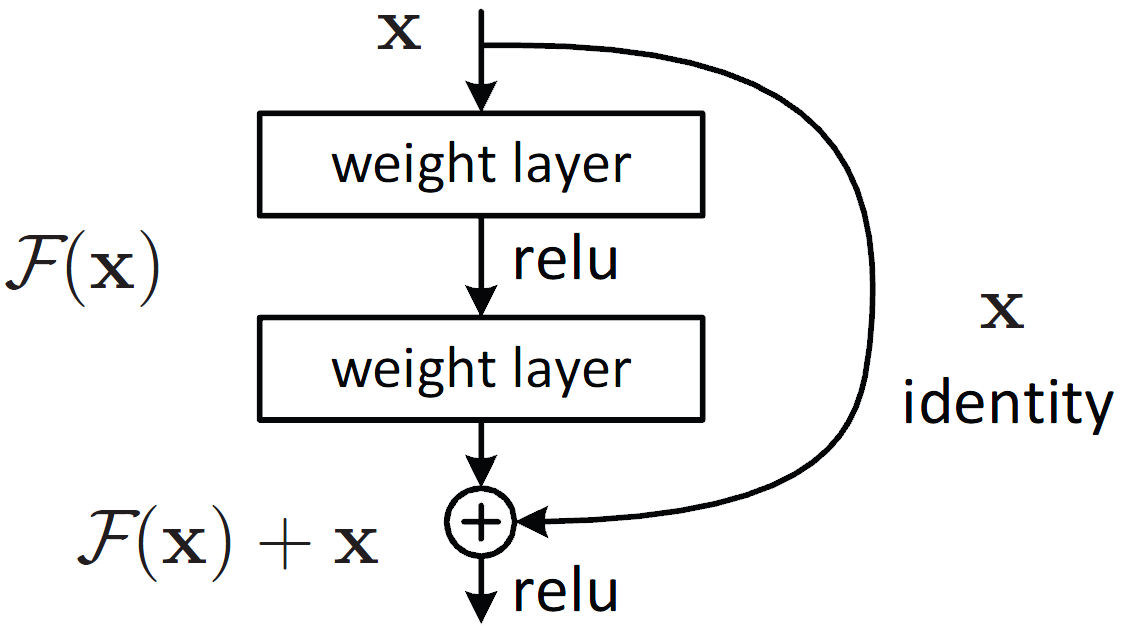

In [ ]:
%%writefile -a pruning_utils.py

from utils import get_layer_by_name, replace_layer_by_name

def prune_output_channels_in_conv(conv_orig, channel_mask):

    n_channels = channel_mask.sum()

    # Create nn.Conv2d with smaller number of output channels and plug weight and bias (if any)
    # from original convolution into it

    # Your code here
    has_bias = conv_orig.bias is not None

    conv_pruned = nn.Conv2d(in_channels=,
                            out_channels=,
                            kernel_size=,
                            stride=conv_orig.stride,
                            padding=conv_orig.padding,
                            bias=has_bias)

    conv_pruned.weight.data = conv_orig.weight.data[channel_mask].clone()
    if has_bias:
      conv_pruned.bias.data = conv_orig.bias.data[channel_mask].clone()

    return conv_pruned

def prune_batchnorm(bn_orig, channel_mask):

    n_channels = channel_mask.sum()

    # Create nn.BatchNorm2d with smaller number of features and plug weight, bias, running_mean and running_var
    # from original batchnorm into it

    # Your code here
    bn_pruned = nn.BatchNorm2d(n_channels)

    bn_pruned.weight.data  =
    bn_pruned.bias.data    =
    bn_pruned.running_mean =
    bn_pruned.running_var  =
    # check other fields of BN

    return bn_pruned

def prune_input_channels_in_conv(conv_orig, channel_mask):

    n_channels = channel_mask.sum()

    # Create nn.Conv2d with smaller number of input channels and plug weight and bias (if any)
    # from original convolution into it

    # Your code here
    has_bias = conv_orig.bias is not None

    conv_pruned = nn.Conv2d(in_channels=,
                            out_channels=,
                            kernel_size=,
                            stride=conv_orig.stride,
                            padding=conv_orig.padding,
                            bias=has_bias)

    conv_pruned.weight.data = conv_orig.weight.data[:, channel_mask].clone()
    if has_bias:
        conv_pruned.bias.data = conv_orig.bias.data.clone()

    return conv_pruned


def update_layer(basicblock, channel_mask):

    # update output channels in 1st convolution
    basicblock.conv1 = prune_output_channels_in_conv(basicblock.conv1, channel_mask)

    # update BatchNorm
    basicblock.bn1 = prune_batchnorm(basicblock.bn1, channel_mask)

    # update input channels in 2nd convolution
    basicblock.conv2 = prune_input_channels_in_conv(basicblock.conv2, channel_mask)


def prune_BasicBlock(basicblock_orig, pruning_rate, channel_selection_strategy="slimming", strategy="local"):

    basicblock = deepcopy(basicblock_orig)

    if channel_selection_strategy == "slimming":

        scales = basicblock.bn1.weight.data.abs()
        channel_mask = get_mask(scales, strategy, pruning_rate)
        update_layer(basicblock, channel_mask)

    elif channel_selection_strategy == "l1":

        # estimate L1 norm of conv1 output channels.
        # Conv weight is of shape (out_channels, input_channels, kernel_size_1, kernel_size_2)

        # Your code here
        norms =
        selected_channels = get_mask(norms, strategy, pruning_rate)
        update_layer(basicblock, selected_channels)

    else:
        print("Unknown channel selection strategy")

    return basicblock

def replace_layers_structed(model, basicblock_list, pruning_rate, channel_selection_strategy="slimming", strategy="local"):

    for basicblock_name in basicblock_list:
        basicblock = get_layer_by_name(model, basicblock_name)
        basicblock_pruned = prune_BasicBlock(basicblock, pruning_rate, channel_selection_strategy, strategy)
        replace_layer_by_name(model, basicblock_name, basicblock_pruned)

Let's try with one Basic block

In [ ]:
basicblock

In [ ]:
import pruning_utils as putils
import importlib
importlib.reload(putils)

basicblock = get_layer_by_name(model, 'layer1.1')

basicblock_pruned = putils.prune_BasicBlock(basicblock, 0.1)
basicblock_pruned

In [ ]:
%%writefile -a pruning_utils.py

def prune_structed(model, basic_block_list, prune_rate=0.1, channel_selection_strategy="slimming"):

    # make copy of model
    model_pruned = deepcopy(model)

    # replace original blocks with pruned blocks
    replace_layers_structed(model_pruned, basic_block_list, prune_rate, channel_selection_strategy)

    return model_pruned

In [ ]:
import importlib
importlib.reload(putils)
model_pruned = putils.prune_structed(model, basic_block_layers, prune_rate=0.1)

Collect models MACs

In [ ]:
instances = [nn.Conv2d, nn.Linear, nn.BatchNorm2d, nn.ReLU,
             nn.MaxPool2d, nn.AvgPool2d, nn.Softmax]

stats1 = FlopCo(model, img_size = (1, 3, 32, 32), instances=instances)
stats2 = FlopCo(model_pruned, img_size = (1, 3, 32, 32), instances=instances)

f'MACs ratio: {stats2.total_macs / stats1.total_macs:.3f}'

Look at BatchNorm calibration

In [ ]:
from utils import batchnorm_callibration, get_validation_scores, fix_random_seed, get_cifar100_dataloader

fix_random_seed(seed=42)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset_path = './'
batch_size = 256
num_workers = 0

train_loader, val_loader = get_cifar100_dataloader(dataset_path, batch_size, num_workers)
calibrate_batches = 200

model_pruned = model_pruned.to(device)
model = model.to(device)

In [ ]:
model = ResNet18_8x(num_classes=100)
model.load_state_dict(torch.load("cifar100-resnet18_8x.pt"))

conv_layers = [module_name for module_name, module in model.named_modules() if isinstance(module, nn.Conv2d)]

model_pruned = putils.prune_structed(model, basic_block_layers, prune_rate=0.3)

model_pruned = model_pruned.to(device)
model = model.to(device)

In [ ]:
top1_acc, top5_acc = get_validation_scores(model, val_loader, device=device)
print(f'Original model. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')

top1_acc, top5_acc = get_validation_scores(model_pruned, val_loader, device=device)
print(f'Pruned model. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')

batchnorm_callibration(model_pruned.eval(), train_loader, layer_name="conv1", n_callibration_batches=calibrate_batches, device=device)

top1_acc, top5_acc = get_validation_scores(model_pruned, val_loader, device=device)
print(f'Calibrated model. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')

In [ ]:
stats1 = FlopCo(model, img_size = (1, 3, 32, 32), instances=instances, device=device)
non_zero_ratios, top1_accs, top1_bn_accs = [], [], []

for prune_rate in [0.25, 0.5, 0.75]:

    model_pruned = putils.prune_structed(model, basic_block_layers, prune_rate=prune_rate)
    model_pruned = model_pruned.to(device)
    stats2 = FlopCo(model_pruned, img_size = (1, 3, 32, 32), instances=instances, device=device)
    ratio = stats2.total_macs / stats1.total_macs

    top1_acc, _ = get_validation_scores(model_pruned, val_loader, device=device)
    batchnorm_callibration(model_pruned.eval(), train_loader, layer_name="conv1", n_callibration_batches=calibrate_batches, device=device)
    top1_acc_bn, _ = get_validation_scores(model_pruned, val_loader, device=device)

    non_zero_ratios += [ratio]
    top1_accs += [top1_acc]
    top1_bn_accs += [top1_acc_bn]

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.plot(non_zero_ratios, top1_accs, label="before bn")
plt.plot(non_zero_ratios, top1_bn_accs, label="after bn")

plt.grid(True)
plt.ylabel("Top 1 accuracy")
plt.xlabel("Non zero ratio")
plt.legend()

In [ ]:
from time import time

In [ ]:
model_pruned = putils.prune_structed(model, basic_block_layers, prune_rate=0.5)

model_pruned = model_pruned.to(device)
model = model.to(device)

stats1 = FlopCo(model, img_size = (1, 3, 32, 32), instances=instances, device=device)
stats2 = FlopCo(model_pruned, img_size = (1, 3, 32, 32), instances=instances, device=device)
ratio = stats2.total_macs / stats1.total_macs
print(f"MACs ratio: {ratio:.3f}")

In [ ]:
times_orig = []
times_pruned = []

with torch.no_grad():
    # warm up
    x = torch.randn(1, 3, 32, 32).to(device)
    for i in range(100):
        model(x)

    for i in range(100):
        t0 = time()
        model(x)

        times_orig += [time() - t0]

    # warm up
    for i in range(100):
        model_pruned(x)

    for i in range(100):
        t0 = time()
        model_pruned(x)
        times_pruned += [time() - t0]

f"Mean time of original/pruned model: {np.mean(times_orig):.3e}/{np.mean(times_pruned):.3e}"

The same for CPU

In [ ]:
times_orig = []
times_pruned = []


with torch.no_grad():
    # warm up
    x = torch.randn(1, 3, 32, 32).to("cpu")
    model.cpu()
    for i in range(100):
        model(x)

    for i in range(100):
        t0 = time()
        model(x)

        times_orig += [time() - t0]

    model_pruned.cpu()
    # warm up
    for i in range(100):
        model_pruned(x)

    for i in range(100):
        t0 = time()
        model_pruned(x)
        times_pruned += [time() - t0]

f"Mean time of original/pruned model: {np.mean(times_orig):.3e}/{np.mean(times_pruned):.3e}"

# Compare Structed and Unstructed Pruning

In [ ]:
model = ResNet18_8x(num_classes=100)
model.load_state_dict(torch.load("cifar100-resnet18_8x.pt"))

conv_layers = [module_name for module_name, module in model.named_modules() if isinstance(module, nn.Conv2d)]

model_pruned1 = putils.prune_unstructed(model, conv_layers, strategy="local", prune_rate=0.3)
model_pruned2 = putils.prune_structed(model, basic_block_layers, prune_rate=0.3)

model_pruned1 = model_pruned1.to(device)
model_pruned2 = model_pruned2.to(device)
model = model.to(device)

batchnorm_callibration(model_pruned1.eval(), train_loader, layer_name="conv1", n_callibration_batches=calibrate_batches, device=device)
batchnorm_callibration(model_pruned2.eval(), train_loader, layer_name="conv1", n_callibration_batches=calibrate_batches, device=device)

top1_acc, top5_acc = get_validation_scores(model_pruned1, val_loader, device=device)
print(f'Unstructed pruning. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')
top1_acc, top5_acc = get_validation_scores(model_pruned2, val_loader, device=device)
print(f'Structed pruning. Top 1 acc: {top1_acc:.3f}, Top 5 acc: {top5_acc:.3f}')